In [1]:
# chapter 7-1 pandasとmatplotlibを使った探索的データ分析

In [2]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
player = 'Roger Federer'
filename = "data/{name}.csv".format(name=player.replace(' ', '-'))
df = pd.read_csv(filename)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179 entries, 0 to 1178
Data columns (total 70 columns):
year                                     1179 non-null int64
tournament                               1179 non-null object
start date                               1179 non-null object
type                                     1179 non-null object
surface                                  1179 non-null object
draw                                     1179 non-null object
atp points                               1139 non-null object
atp ranking                              1177 non-null float64
tournament prize money                   1170 non-null object
round                                    1179 non-null object
opponent                                 1179 non-null object
ranking                                  1105 non-null object
score                                    1179 non-null object
stats link                               1179 non-null object
tournament.1             

In [5]:
df['win'] = df['winner'] == player
df['win'].tail() 

1174    False
1175     True
1176     True
1177     True
1178    False
Name: win, dtype: bool

In [6]:
print(("{player} has won {vic:.0f}% of his ATP matches.").format(player=player, vic=100*df['win'].mean()))

Roger Federer has won 82% of his ATP matches.


In [7]:
date = pd.to_datetime(df['start date'])

In [8]:
df['dblfaults'] = (df['player1 double faults'] / df['player1 total points total'])

In [9]:
df['dblfaults'].tail()

1174    0.018116
1175    0.000000
1176    0.000000
1177    0.011561
1178         NaN
Name: dblfaults, dtype: float64

In [10]:
df['dblfaults'].describe()

count    1027.000000
mean        0.012129
std         0.010797
min         0.000000
25%         0.004444
50%         0.010000
75%         0.018108
max         0.060606
Name: dblfaults, dtype: float64

In [11]:
df.groupby('surface')['win'].mean()

surface
Indoor: Carpet    0.736842
Indoor: Clay      0.833333
Indoor: Hard      0.836283
Outdoor: Clay     0.779116
Outdoor: Grass    0.871429
Outdoor: Hard     0.842324
Name: win, dtype: float64

In [12]:
gb = df.groupby('year')

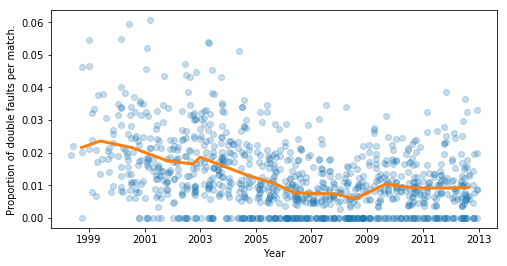

In [13]:
plt.figure(figsize=(8, 4))
plt.plot_date(date.astype(datetime), df['dblfaults'], alpha=.25, lw=0);
plt.plot_date(gb['start date'].max(),  gb['dblfaults'].mean(), '-', lw=3);
plt.xlabel('Year');
plt.ylabel('Proportion of double faults per match.');

In [14]:
# 7-2 はじめての統計的仮説検定 : 簡単なZ検定